# Assigment 1: Image Intensity Transformation

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
%matplotlib inline

In [28]:
i = np.arange(256)

In [68]:
def histogram(A, no_levels):
    # gets the size of the input matrix
    N, M = A.shape
    # creates an empty histogram with size proportional to the number of graylevels 
    hist = np.zeros(no_levels).astype(int)

    # computes for all levels in the range
    for i in range(no_levels):
        # the np.where() function returns the indices for all coordinates 
        # in some array matching the condition. In this case, all pixels
        # that have value 'i'
        pixels_value_i = np.where(A == i)
        
        #print(pixels_value_i)  # uncomment to print array of coordinates
        
        # by counting how many coordinates the np.where function returned, 
        # we can assign it at the respective histogram bin
        # this is done by getting the size of the vector of coordinates
        hist[i] = pixels_value_i[0].shape[0]
            
    return(hist)

### Inversion Function

The function belows applies the function $T(i) = 255 - i$ to the input image

In [42]:
def inversion(img):
    # timg is the transformed image
    timg = 255 - img
    
    # function that represents the transformation
    fidentity = i
    fcontrast = 255 - i
    
    # plotting images and respective graphs
    ## showing original image
    plt.figure(figsize=(8,8))
    plt.subplot(2,2,1)
    plt.imshow(img, cmap="gray")
    plt.subplot(2,2,2)
    plt.plot(i, fidentity)
    ## showing transformed image
    plt.subplot(2,2,3)
    plt.imshow(timg, cmap="gray")
    plt.subplot(2,2,4)
    plt.plot(i, finversion)
    
    return timg

In [73]:
def contrastModulation(c, d, img):
    a = img.min() 
    b = img.max()
    
    timg = ((img-a)*((d-c)/(int(b)-int(a))))+c
    
    # function that represents the transformation
    fidentity = i
    fcontrast = ((i-a)*((d-c)/(int(b)-int(a))))+c
    
    hist = histogram(img, 256)
    thist = histogram(timg, 256)
    
    # plotting images and respective graphs
    print("Contrast Modulation Function")
    print("Image interval: [a:%d, b:%d]" % (a, b))
    print("Image interval: [c:%d, d:%d]" % (c, d))
    plt.figure(figsize=(10,10))
    ## graph of original image
    plt.subplot(3,2,1)
    plt.plot(i, fidentity)
    plt.xlabel('input pixel value (i)')
    plt.ylabel('output pixel value (s)')
    ## graph of function applied
    plt.subplot(3,2,2)
    plt.plot(i, fcontrast)
    plt.xlabel('input pixel value (i)')
    plt.ylabel('output pixel value (s)')
    ## showing original image
    plt.subplot(3,2,3)
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.subplot(3,2,4)
    plt.bar(range(256), hist)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    ## showing transformed image
    plt.subplot(3,2,5)
    plt.imshow(timg, cmap="gray")
    plt.axis('off')
    plt.subplot(3,2,6)
    plt.bar(range(256), thist)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    
    return timg

In [87]:
def logarithmicFunction(img):
    R = img.max()
    
    timg = (255 * np.log2(1+img).astype(np.float64) / np.log2(1+R).astype(np.float64)).astype(np.uint8)
    
    # function that represents the transformation
    fidentity = i
    flog2 = (255 * np.log2(1+i).astype(np.float64) / np.log2(1+R).astype(np.float64))
    
    # histograms of each image
    hist = histogram(img, 256)
    thist = histogram(timg, 256)
    
    # plotting images and respective graphs
    print("Logarithmic Function")
    plt.figure(figsize=(10,10))
    ## graph of original image
    plt.subplot(3,2,1)
    plt.plot(i, fidentity)
    plt.xlabel('input pixel value (i)')
    plt.ylabel('output pixel value (s)')
    ## graph of function applied
    plt.subplot(3,2,2)
    plt.plot(i, flog2)
    plt.xlabel('input pixel value (i)')
    plt.ylabel('output pixel value (s)')
    ## showing original image
    plt.subplot(3,2,3)
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.subplot(3,2,4)
    plt.bar(range(256), hist)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    ## showing transformed image
    plt.subplot(3,2,5)
    plt.imshow(timg, cmap="gray")
    plt.axis('off')
    plt.subplot(3,2,6)
    plt.bar(range(256), thist)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    
    return timg

In [26]:
def gammaAdjustment(W, lambd, img):
    return W * img**lambd

In [95]:
def main(filename, method):
    input_img = imageio.imread(filename)
    
    if method == 1:
        output_img = inversion(input_img)

    if method == 2:
        print("Defina novo intervalo [c, d]: \n")
        print("c: ")
        c = int(input())
        print("d: ")
        d = int(input())
        output_img = contrastModulation(c, d, input_img)

    if method == 3:
        output_img = logarithmicFunction(input_img)

    if method == 4:
        W = int(input())
        lambd = float(input())
        output_img = gammaAdjustment(W, lambd, input_img)
        
    #rse = np.sqrt(np.sum(((output_img).astype(float) - (input_img).astype(float))**3)
    #print(rse)

SyntaxError: invalid syntax (<ipython-input-95-6b58093029df>, line 24)

150
200
Contrast Modulation Function
Image interval: [a:0, b:255]
Image interval: [c:150, d:200]


<ipython-input-87-6ba1ce45ac2f>:4: RuntimeWarning: divide by zero encountered in log2
  timg = (255 * np.log2(1+img).astype(np.float64) / np.log2(1+R).astype(np.float64)).astype(np.uint8)


Logarithmic Function
1
0.25


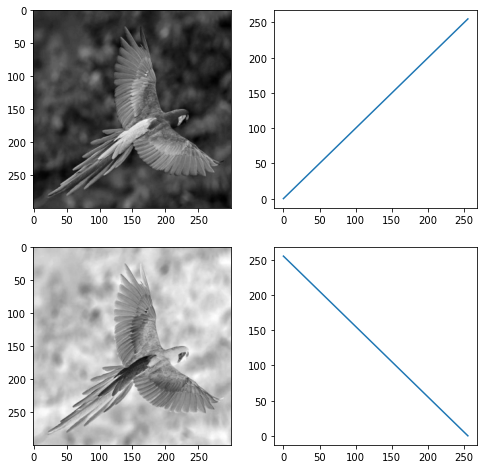

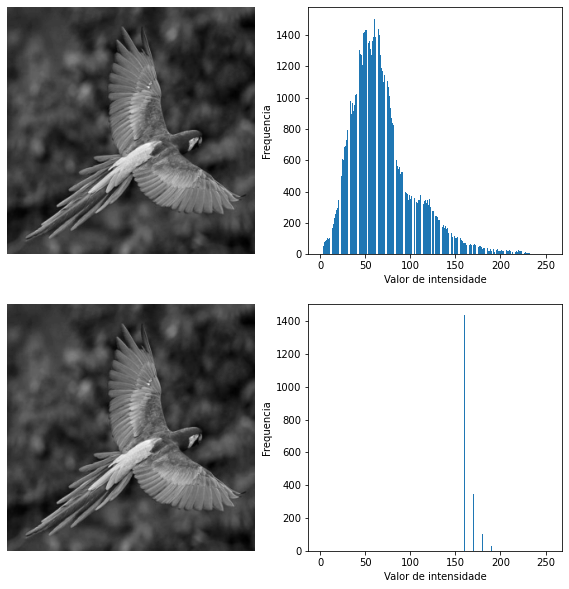

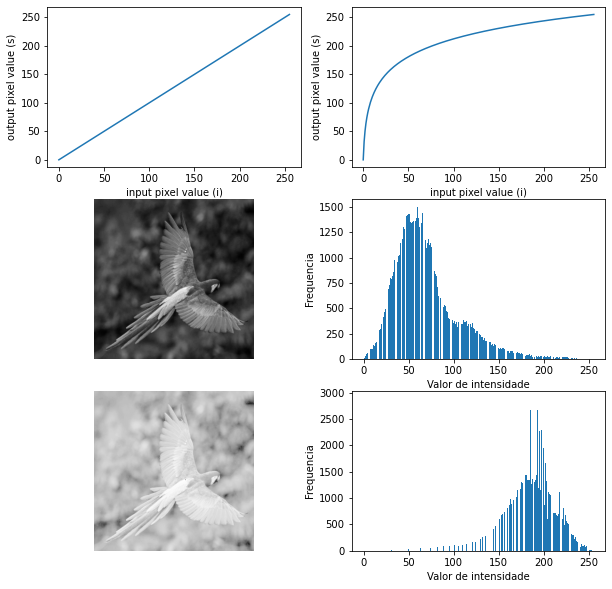

In [94]:
main("arara.png", 1)
main("arara.png", 2)
main("arara.png", 3)
main("arara.png", 4)

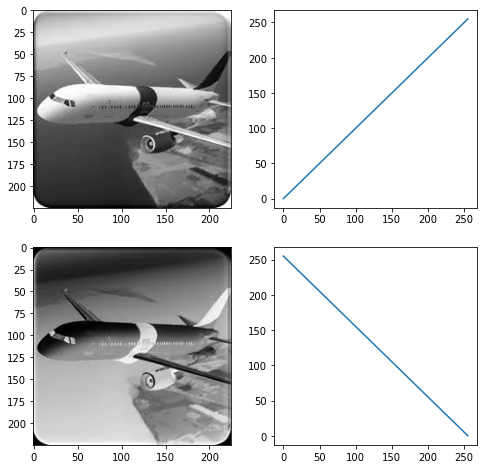

In [97]:
# 1st case
main("airplane.png", 1)

0
50
Contrast Modulation Function
Image interval: [a:0, b:255]
Image interval: [c:0, d:50]


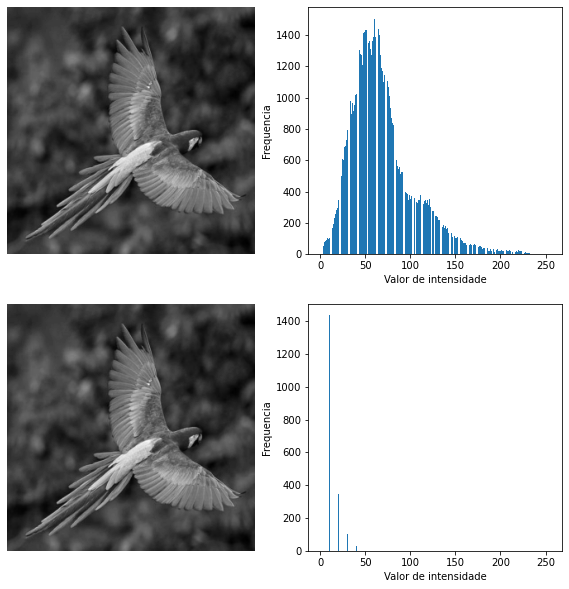

In [98]:
# 2nd case
# [c, d] = [0,50]
main("arara.png", 2) 

In [ ]:
# 3rd case
# [c,d] = [150,200]
main("baboon.png", 2) 

200
220
Contrast Modulation Function
Image interval: [a:0, b:255]
Image interval: [c:200, d:220]


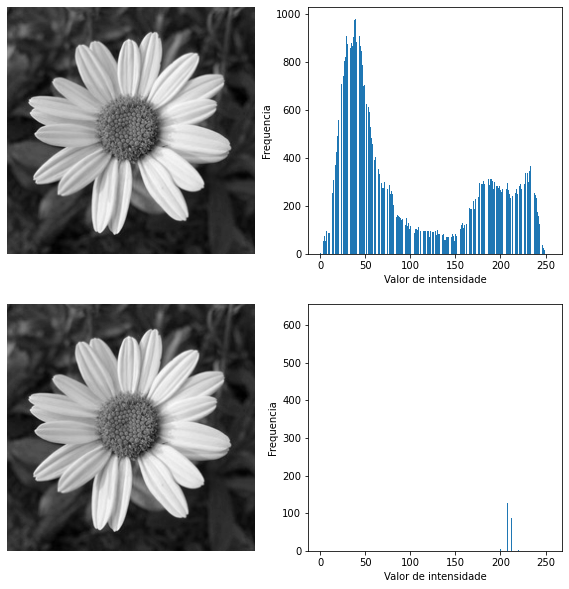

In [99]:
# 4th case
# [c,d] = [200,220]
main("flower.png", 2) 

In [ ]:
# 5th case
main("arara.png", 3)

In [ ]:
# 6th case
main("airplane.png", 3)

In [ ]:
# 7th case
main("flower.png", 3)

In [ ]:
# 8th case
# W = 2
# lambda = 0.5
main("baboon.png", 4) 

In [ ]:
# 9th case
# W = 10
# lambda = 0.25
main("flower.png", 4) 